<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Week4_Exercise_Course4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,LSTM, Bidirectional

In [271]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv


--2020-10-05 04:02:56--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.03s   

2020-10-05 04:02:56 (2.35 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



(3650,)
(3650,)


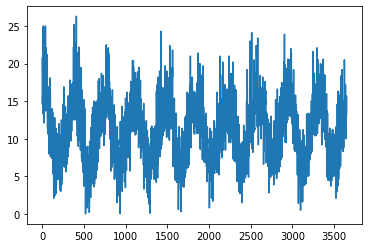

In [273]:
series=[]
with open('/tmp/daily-min-temperatures.csv','r') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    series.append(float(row[1]))
  series=np.array(series)
  time = np.arange(len(series))
  print(series.shape)
  print(time.shape)
  plt.plot(time,series)
 

In [281]:
split_time = 3000
train_time=time[:split_time]
x_train = series[:split_time]
valid_time=time[split_time:]
x_valid=series[split_time:]
window_size=20
batch_size=64
shuffle_buffer_size=1000
                

In [282]:
def windowed_dataset(series,batch_size,window_size,shuffle_buffer_size):
  series = tf.expand_dims(series,axis=[-1])
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size+1,shift=1,drop_remainder=True)
  ds = ds.flat_map(lambda window: window.batch(window_size+1))
  ds = ds.shuffle(shuffle_buffer_size)
  ds = ds.map(lambda window: (window[:-1], window[-1:]))
  return ds.batch(batch_size).prefetch(1)


In [283]:
train_set = windowed_dataset(series,batch_size,window_size,shuffle_buffer_size)

In [290]:
model = Sequential( [Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  Bidirectional(LSTM(64, return_sequences=True)),
  LSTM(64, return_sequences=True),
  Dense(40, activation="relu"),
  Dense(20, activation="relu"),
  Dense(10, activation="relu"),
  Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=50, callbacks=[lr_schedule]),


Epoch 1/50
57/57 [==============================] - 3s 54ms/step - loss: 50.4112 - mae: 50.9112
Epoch 2/50
57/57 [==============================] - 3s 56ms/step - loss: 46.9685 - mae: 47.4685
Epoch 3/50
57/57 [==============================] - 3s 54ms/step - loss: 43.0363 - mae: 43.5363
Epoch 4/50
57/57 [==============================] - 3s 54ms/step - loss: 38.6285 - mae: 39.1284
Epoch 5/50
57/57 [==============================] - 3s 55ms/step - loss: 33.6571 - mae: 34.1571
Epoch 6/50
57/57 [==============================] - 3s 54ms/step - loss: 28.0360 - mae: 28.5358
Epoch 7/50
57/57 [==============================] - 3s 55ms/step - loss: 21.8198 - mae: 22.3190
Epoch 8/50
57/57 [==============================] - 3s 55ms/step - loss: 15.3727 - mae: 15.8708
Epoch 9/50
57/57 [==============================] - 3s 55ms/step - loss: 9.3166 - mae: 9.8100
Epoch 10/50
57/57 [==============================] - 3s 55ms/step - loss: 4.7453 - mae: 5.2241
Epoch 11/50
57/57 [========================